# WeatherPy
----

### Analysis
*As expected, temperature peaks near the equator, with temperature gradually decreases as distance from the equator increases in both directions.

*The lowest percentage humidity locations are nearest to the equator.

*There does not seem to be any discernible relationship between latitude and wind speed.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sns
import csv
import urllib

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File(CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeather API Key
api_key = "feda5f3575892fd7a400eb18fc84cc76"

# Starting URL for Weather MAP API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes:
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Group cities in sets of 50 for logging purposes:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bakchar
Processing Record 2 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bluff
Processing Record 3 of Set 1 | bograd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bograd
Processing Record 4 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lavrentiya
Processing Record 5 of Set 1 | kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kuching
Processing Record 6 of Set 1 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=usinsk
Processing Record 7 of Set 1 | barentsburg

Processing Record 3 of Set 2 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=castro
Processing Record 4 of Set 2 | bumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bumba
Processing Record 5 of Set 2 | lapua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lapua
Processing Record 6 of Set 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=chokurdakh
Processing Record 8 of Set 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=saldanha
Processing Record 9 of Set 2 | zhongshu
http://api.openw

Processing Record 6 of Set 3 | nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nguiu
City not found. Skipping...
Processing Record 7 of Set 3 | baoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=baoro
Processing Record 8 of Set 3 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=santa%20maria
Processing Record 9 of Set 3 | tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=tromso
Processing Record 10 of Set 3 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kavieng
Processing Record 11 of Set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mahebourg
Processing Record 12 of Set 3 | madaba
http://api.openweathermap.o

Processing Record 9 of Set 4 | mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mecca
Processing Record 10 of Set 4 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mys%20shmidta
City not found. Skipping...
Processing Record 11 of Set 4 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bosaso
Processing Record 12 of Set 4 | tapiramuta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=tapiramuta
Processing Record 13 of Set 4 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=narsaq
Processing Record 14 of Set 4 | at-bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=at-bashi
Processing Record 15 of Set 4 | naze
http://api.openweath

Processing Record 11 of Set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=luderitz
Processing Record 12 of Set 5 | saryg-sep
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=saryg-sep
Processing Record 13 of Set 5 | clifton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=clifton
Processing Record 14 of Set 5 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=dudinka
Processing Record 15 of Set 5 | kemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kemi
Processing Record 16 of Set 5 | kandry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kandry
Processing Record 17 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 15 of Set 6 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=balabac
Processing Record 16 of Set 6 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=chicama
Processing Record 17 of Set 6 | kondol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kondol
Processing Record 18 of Set 6 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kenai
Processing Record 19 of Set 6 | majene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=majene
Processing Record 20 of Set 6 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kaitangata
Processing Record 21 of Set 6 | erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 18 of Set 7 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=karaul
City not found. Skipping...
Processing Record 19 of Set 7 | havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=havelock
Processing Record 20 of Set 7 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=clyde%20river
Processing Record 21 of Set 7 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=grindavik
Processing Record 22 of Set 7 | biratnagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=biratnagar
Processing Record 23 of Set 7 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=banda%20aceh
Processing Record 24 of Set 7 | mamont

City not found. Skipping...
Processing Record 21 of Set 8 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=rio%20gallegos
Processing Record 22 of Set 8 | la rioja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=la%20rioja
Processing Record 23 of Set 8 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lompoc
Processing Record 24 of Set 8 | cuamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=cuamba
Processing Record 25 of Set 8 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bathsheba
Processing Record 26 of Set 8 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nizhniy%20kuranakh
Processing Record 27 of Set 8 

Processing Record 24 of Set 9 | puqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=puqi
Processing Record 25 of Set 9 | lobito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lobito
Processing Record 26 of Set 9 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=padang
Processing Record 27 of Set 9 | jiayuguan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=jiayuguan
Processing Record 28 of Set 9 | dong hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=dong%20hoi
Processing Record 29 of Set 9 | aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=aleksandrov%20gay
Processing Record 30 of Set 9 | guangyuan
http://api.openweathermap.org/data/2

Processing Record 27 of Set 10 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=laguna
Processing Record 28 of Set 10 | sitionuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=sitionuevo
Processing Record 29 of Set 10 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=russell
Processing Record 30 of Set 10 | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=alekseyevsk
Processing Record 31 of Set 10 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=te%20anau
Processing Record 32 of Set 10 | gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=gao
Processing Record 33 of Set 10 | tandalti
http://api.openweathermap.org/data/2.5/w

Processing Record 30 of Set 11 | denia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=denia
Processing Record 31 of Set 11 | pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=pedernales
Processing Record 32 of Set 11 | guasdualito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=guasdualito
Processing Record 33 of Set 11 | cap estate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=cap%20estate
Processing Record 34 of Set 11 | bignona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bignona
Processing Record 35 of Set 11 | bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bayir
Processing Record 36 of Set 11 | meru
http://api.openweathermap.org/data/2

Processing Record 34 of Set 12 | nakhon phanom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nakhon%20phanom
Processing Record 35 of Set 12 | bulalacao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bulalacao
Processing Record 36 of Set 12 | mozarlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mozarlandia
Processing Record 37 of Set 12 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bonavista
Processing Record 38 of Set 12 | bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=bereda
Processing Record 39 of Set 12 | middleton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=middleton
Processing Record 40 of Set 12 | rock hill
http://api.op

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

# Convert array of JSONs into Pandas Dataframe
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

#Show Record Count
city_data_pd.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [9]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bakchar,64,RU,1538440148,69,57.02,82.07,38.07,4.56
1,bluff,0,AU,1538440148,40,-23.58,149.07,74.34,11.50
2,bograd,0,RU,1538436600,87,54.22,90.86,44.60,5.35
3,lavrentiya,68,RU,1538440148,90,65.58,-170.99,46.53,16.64
4,kuching,75,MY,1538438400,94,1.56,110.34,77.00,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

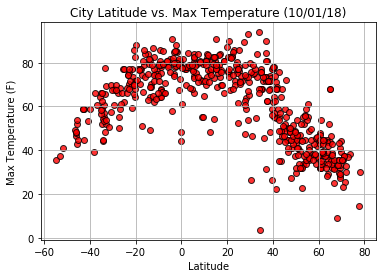

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="red",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("../Images/MaxTemp.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

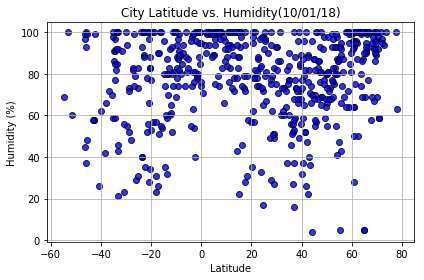

In [14]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
plt.savefig("../Images/Humidity.png")

# Show Plot
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

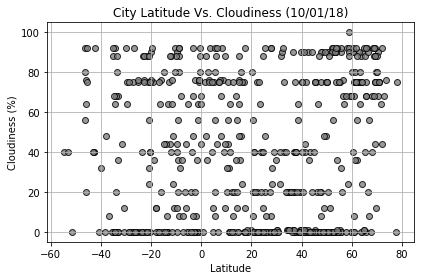

In [15]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
plt.savefig("../Images/Cloudiness.png")

#Show Plot
plt.tight_layout()
plt.show()


#### Latitude vs. Wind Speed Plot

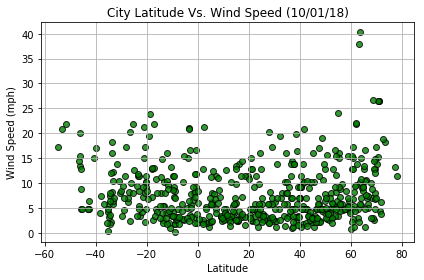

In [16]:

#Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            color="green",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
plt.savefig("../Images/WindGraph.png")

#Show Plot
plt.tight_layout()
plt.show()